In [ ]:
"""
Collection of codes to calculate mie related value of liquid and ice cloud particles

*** requires the pymiecoated module ***
can be found at: 
Leinonen, J., Python code for calculating Mie scattering from single- and dual-layered spheres. Available at http://code.google.com/p/pymiecoated/.
"""

In [54]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
from mpltools import color
%matplotlib inline
import numpy as np
import scipy
import IPython
IPython.InteractiveShell.cache_size = 0
import pymiecoated as pmie
fp='C:/Users/sleblan2/Research/ARISE/'

Load/define the wavelenghts and refractive indices

In [2]:
wavelen_liq = [0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 
    0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 
    0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 
    0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 
    0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 
    0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 
    0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 
    0.78, 0.785, 0.79, 0.795, 0.8, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 
    0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 
    0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 
    0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 
    1, 1.005, 1.01, 1.015, 1.02, 1.025, 1.03, 1.035, 1.04, 1.045, 1.05, 
    1.055, 1.06, 1.065, 1.07, 1.075, 1.08, 1.085, 1.09, 1.095, 1.1, 1.105, 
    1.11, 1.115, 1.12, 1.125, 1.13, 1.135, 1.14, 1.145, 1.15, 1.155, 1.16, 
    1.165, 1.17, 1.175, 1.18, 1.185, 1.19, 1.195, 1.2, 1.205, 1.21, 1.215, 
    1.22, 1.225, 1.23, 1.235, 1.24, 1.245, 1.25, 1.255, 1.26, 1.265, 1.27, 
    1.275, 1.28, 1.285, 1.29, 1.295, 1.3, 1.305, 1.31, 1.315, 1.32, 1.325, 
    1.33, 1.335, 1.34, 1.345, 1.35, 1.355, 1.36, 1.365, 1.37, 1.375, 1.38, 
    1.385, 1.39, 1.395, 1.4, 1.405, 1.41, 1.415, 1.42, 1.425, 1.43, 1.435, 
    1.44, 1.445, 1.45, 1.455, 1.46, 1.465, 1.47, 1.475, 1.48, 1.485, 1.49, 
    1.495, 1.5, 1.505, 1.51, 1.515, 1.52, 1.525, 1.53, 1.535, 1.54, 1.545, 
    1.55, 1.555, 1.56, 1.565, 1.57, 1.575, 1.58, 1.585, 1.59, 1.595, 1.6, 
    1.605, 1.61, 1.615, 1.62, 1.625, 1.63, 1.635, 1.64, 1.645, 1.65, 1.655, 
    1.66, 1.665, 1.67, 1.675, 1.68, 1.685, 1.69, 1.695, 1.7, 1.705, 1.71, 
    1.715, 1.72, 1.725, 1.73, 1.735, 1.74, 1.745, 1.75, 1.755, 1.76, 1.765, 
    1.77, 1.775, 1.78, 1.785, 1.79, 1.795, 1.8, 1.805, 1.81, 1.815, 1.82, 
    1.825, 1.83, 1.835, 1.84, 1.845, 1.85, 1.855, 1.86, 1.865, 1.87, 1.875, 
    1.88, 1.885, 1.89, 1.895, 1.9, 1.905, 1.91, 1.915, 1.92, 1.925, 1.93, 
    1.935, 1.94, 1.945, 1.95, 1.955, 1.96, 1.965, 1.97, 1.975, 1.98, 1.985, 
    1.99, 1.995, 2, 2.005, 2.01, 2.015, 2.02, 2.025, 2.03, 2.035, 2.04, 
    2.045, 2.05, 2.055, 2.06, 2.065, 2.07, 2.075, 2.08, 2.085, 2.09, 2.095, 
    2.1, 2.105, 2.11, 2.115, 2.12, 2.125, 2.13, 2.135, 2.14, 2.145, 2.15, 
    2.155, 2.16, 2.165, 2.17, 2.175, 2.18, 2.185, 2.19, 2.195, 2.2, 2.205, 
    2.21, 2.215, 2.22, 2.225, 2.23, 2.235, 2.24, 2.245, 2.25]
refre_liq = [1.34978473186493, 1.34910321235657, 1.34844326972961, 
    1.34780478477478, 1.34719002246857, 1.3465918302536, 1.34601378440857, 
    1.34545123577118, 1.34490716457367, 1.3443797826767, 1.34386682510376, 
    1.34336709976196, 1.3428829908371, 1.3424106836319, 1.34195113182068, 
    1.34150516986847, 1.34106981754303, 1.3406445980072, 1.34023010730743, 
    1.33982717990875, 1.33943235874176, 1.33904731273651, 1.33867228031158, 
    1.3383047580719, 1.33794403076172, 1.33759391307831, 1.33724999427795, 
    1.33691370487213, 1.33658313751221, 1.33626019954681, 1.3359432220459, 
    1.33563339710236, 1.33532953262329, 1.33503139019012, 1.33473825454712, 
    1.33445024490356, 1.33416819572449, 1.33389055728912, 1.33361983299255, 
    1.3333512544632, 1.33308899402618, 1.33283054828644, 1.33257496356964, 
    1.33232593536377, 1.33207845687866, 1.33183419704437, 1.33159589767456, 
    1.3313604593277, 1.33113169670105, 1.33090615272522, 1.33068859577179, 
    1.33047497272491, 1.33026659488678, 1.33006298542023, 1.32986438274384, 
    1.3296719789505, 1.32948124408722, 1.32929599285126, 1.32911467552185, 
    1.32893872261047, 1.32876348495483, 1.32859265804291, 1.32842612266541, 
    1.32826292514801, 1.32810258865356, 1.32794570922852, 1.32779133319855, 
    1.32763755321503, 1.32749044895172, 1.32734215259552, 1.32719790935516, 
    1.32705748081207, 1.32691812515259, 1.32678043842316, 1.32664358615875, 
    1.32650971412659, 1.32637763023376, 1.32625007629395, 1.32612144947052, 
    1.32599520683289, 1.32586979866028, 1.32574820518494, 1.32562601566315, 
    1.32550501823425, 1.32538723945618, 1.32526993751526, 1.32515358924866, 
    1.32503867149353, 1.32492470741272, 1.32481133937836, 1.32470011711121, 
    1.32459151744843, 1.32448053359985, 1.32437241077423, 1.32426464557648, 
    1.32415854930878, 1.32405340671539, 1.32394850254059, 1.32384240627289, 
    1.32373940944672, 1.32363772392273, 1.32353484630585, 1.32343220710754, 
    1.32333290576935, 1.32323122024536, 1.32313203811646, 1.323033452034, 
    1.3229341506958, 1.32283651828766, 1.32273864746094, 1.32264161109924, 
    1.32254576683044, 1.32245028018951, 1.32235324382782, 1.32225859165192, 
    1.32216477394104, 1.32207024097443, 1.32197535037994, 1.32188153266907, 
    1.32178771495819, 1.32169497013092, 1.32160127162933, 1.32150781154633, 
    1.32141363620758, 1.3213198184967, 1.32122731208801, 1.32113540172577, 
    1.3210426568985, 1.32095015048981, 1.32085776329041, 1.32076585292816, 
    1.32067430019379, 1.32058310508728, 1.32049107551575, 1.32039904594421, 
    1.32030558586121, 1.32021284103394, 1.32012176513672, 1.32003057003021, 
    1.31993842124939, 1.31984663009644, 1.31975471973419, 1.31966304779053, 
    1.31956970691681, 1.31947696208954, 1.31938445568085, 1.31929230690002, 
    1.31919932365417, 1.31910669803619, 1.31901490688324, 1.31892359256744, 
    1.31883227825165, 1.31874084472656, 1.31864857673645, 1.31855666637421, 
    1.31846392154694, 1.31837153434753, 1.31827783584595, 1.31818437576294, 
    1.3180912733078, 1.31799852848053, 1.31790411472321, 1.31781017780304, 
    1.31771612167358, 1.31762194633484, 1.31752717494965, 1.31743264198303, 
    1.31733620166779, 1.31723988056183, 1.31714355945587, 1.31704771518707, 
    1.31694948673248, 1.31685149669647, 1.31675386428833, 1.31665670871735, 
    1.31655740737915, 1.31645786762238, 1.31635725498199, 1.31625699996948, 
    1.3161563873291, 1.3160560131073, 1.31595373153687, 1.31585144996643, 
    1.31574785709381, 1.31564474105835, 1.3155403137207, 1.31543552875519, 
    1.31532847881317, 1.31522166728973, 1.31511557102203, 1.31500911712646, 
    1.31489956378937, 1.31479048728943, 1.3146790266037, 1.31456708908081, 
    1.31445276737213, 1.31433820724487, 1.31422102451324, 1.31410396099091, 
    1.31398248672485, 1.31386280059814, 1.3137594461441, 1.31366002559662, 
    1.31358194351196, 1.31350469589233, 1.31343054771423, 1.31335592269897, 
    1.31327855587006, 1.31320011615753, 1.31311762332916, 1.31303489208221, 
    1.31295132637024, 1.3128674030304, 1.31278169155121, 1.31269454956055, 
    1.31260120868683, 1.31250691413879, 1.31240630149841, 1.31230485439301, 
    1.3121954202652, 1.31208598613739, 1.31196999549866, 1.3118542432785, 
    1.31173491477966, 1.31161594390869, 1.31149685382843, 1.31137812137604, 
    1.31125795841217, 1.3111377954483, 1.31101608276367, 1.31089353561401, 
    1.31077122688293, 1.31064891815186, 1.31052279472351, 1.31039702892303, 
    1.31027054786682, 1.31014430522919, 1.31001710891724, 1.30988931655884, 
    1.30976033210754, 1.30963134765625, 1.30949938297272, 1.30936777591705, 
    1.30923509597778, 1.3091025352478, 1.30896961688995, 1.30883598327637, 
    1.3086998462677, 1.30856418609619, 1.30842804908752, 1.30829036235809, 
    1.30814981460571, 1.30800879001617, 1.307856798172, 1.30770528316498, 
    1.30755186080933, 1.30739748477936, 1.30724120140076, 1.30708539485931, 
    1.30692899227142, 1.30677139759064, 1.30661201477051, 1.30645298957825, 
    1.30629169940948, 1.30613100528717, 1.30596745014191, 1.30580234527588, 
    1.30563712120056, 1.30547225475311, 1.30530452728271, 1.30513525009155, 
    1.3049647808075, 1.3047947883606, 1.3046213388443, 1.30444550514221, 
    1.30427038669586, 1.30409443378448, 1.30391657352448, 1.30373919010162, 
    1.30355882644653, 1.30337607860565, 1.30318593978882, 1.30299627780914, 
    1.30280101299286, 1.30260360240936, 1.30239689350128, 1.30218493938446, 
    1.3019642829895, 1.30174422264099, 1.3015022277832, 1.30125486850739,1.30099737644196, 1.30074059963226, 1.3004914522171, 1.30024802684784, 
    1.30003678798676, 1.29983460903168, 1.29965353012085, 1.2994612455368, 
    1.29925227165222, 1.2990437746048, 1.29890620708466, 1.29879105091095, 
    1.29879212379456, 1.29878199100494, 1.29873979091644, 1.29869782924652, 
    1.29865026473999, 1.29859912395477, 1.29853558540344, 1.29846835136414, 
    1.29837715625763, 1.29827404022217, 1.29813277721405, 1.29798221588135, 
    1.29781877994537, 1.29765582084656, 1.29748690128326, 1.29731595516205, 
    1.297114610672, 1.29690849781036, 1.2966833114624, 1.29645705223083, 
    1.29622411727905, 1.29598677158356, 1.29573929309845, 1.29549288749695, 
    1.29524719715118, 1.29500222206116, 1.29475831985474, 1.29451525211334, 
    1.29426097869873, 1.29400384426117, 1.29374253749847, 1.29348123073578, 
    1.29321539402008, 1.29294943809509, 1.29267418384552, 1.29239869117737, 
    1.2921177148819, 1.291836977005, 1.2915552854538, 1.29127311706543, 
    1.29098832607269, 1.29070007801056, 1.2904040813446, 1.29010808467865, 
    1.28981161117554, 1.28951108455658, 1.28920447826385, 1.28889608383179, 
    1.28858554363251, 1.28827261924744, 1.287957072258, 1.28763771057129, 
    1.28731369972229, 1.2869873046875, 1.28665804862976, 1.28632473945618, 
    1.28598606586456, 1.28564357757568, 1.2852954864502, 1.28494513034821, 
    1.28459119796753, 1.28423321247101, 1.28386735916138, 1.2834997177124, 
    1.28312718868256, 1.28275334835052, 1.28237426280975, 1.28199315071106]
refim_liq = [1.57926960397958e-09, 1.48345302708464e-09, 1.42391631818839e-09, 
    1.33813082836554e-09, 1.25370402948022e-09, 1.16244169845459e-09, 
    1.08165976175911e-09, 1.01009711706013e-09, 9.32613208881605e-10, 
    8.64073701478674e-10, 8.0744555486234e-10, 7.7941220144595e-10, 
    7.60904894647751e-10, 7.47672035394942e-10, 7.28530846760833e-10, 
    7.02825131426721e-10, 7.09549419219968e-10, 7.15457748601267e-10, 
    7.36075367324673e-10, 7.80733366845254e-10, 9.23267184926857e-10, 
    1.08862119319042e-09, 1.24972721060601e-09, 1.45142853291702e-09, 
    1.56960000552431e-09, 1.64426261495265e-09, 1.76586179012617e-09, 
    1.90502325025932e-09, 2.11416373296913e-09, 2.28551622072359e-09, 
    2.46124898239941e-09, 2.67408295506755e-09, 2.88110935109387e-09, 
    3.13513193184178e-09, 3.42426709210031e-09, 3.80827547274976e-09, 
    4.51198234330263e-09, 5.26186605398493e-09, 6.31866070577303e-09, 
    7.54535101066267e-09, 9.69283053819936e-09, 1.1208237005178e-08, 
    1.24545964652611e-08, 1.32678810160769e-08, 1.40587212982268e-08, 
    1.46939980183447e-08, 1.5064989256075e-08, 1.54877959346322e-08, 
    1.57125850108741e-08, 1.60215627431626e-08, 1.6720964168826e-08, 
    1.78671495376648e-08, 1.92072011628852e-08, 2.02590619835519e-08, 
    2.09990442812114e-08, 2.18581277522389e-08, 2.28474039687399e-08, 
    2.4523163943968e-08, 2.64377533198967e-08, 2.96203506167103e-08, 
    3.37053478460803e-08, 4.15205647641415e-08, 5.07636279678536e-08, 
    6.11507573466952e-08, 7.47528545730347e-08, 9.37514670340533e-08, 
    1.16997313170941e-07, 1.35851180971258e-07, 1.46349449892114e-07, 
    1.53178291384393e-07, 1.55925732769902e-07, 1.58012312567735e-07, 
    1.58049999754439e-07, 1.57083348995002e-07, 1.51876974996412e-07, 
    1.47120502447251e-07, 1.4063508047002e-07, 1.34200277557284e-07, 
    1.28870453863783e-07, 1.25724596955479e-07, 1.25031903053241e-07, 
    1.26860427940301e-07, 1.34819259756114e-07, 1.45682733432295e-07, 
    1.60975204721581e-07, 1.85071485248045e-07, 2.04584708285438e-07, 
    2.22088772261486e-07, 2.47983535928142e-07, 2.67864749048385e-07, 
    2.95979788234035e-07, 3.15075141088528e-07, 3.38026381996315e-07, 
    3.54738546093358e-07, 3.71494451201215e-07, 3.90721538678918e-07, 
    4.0817775470714e-07, 4.23076983224746e-07, 4.43122843307719e-07, 
    4.60859865825114e-07, 4.8842872502064e-07, 5.11528241986525e-07, 
    5.71866792142828e-07, 6.90168917572009e-07, 8.17855266177503e-07, 
    1.07893856693408e-06, 1.42609485465073e-06, 1.74214596881939e-06, 
    2.19241246668389e-06, 2.60822935160832e-06, 2.89574563794304e-06, 
    3.19036871587741e-06, 3.36755874741357e-06, 3.44719205713773e-06, 
    3.49747688233037e-06, 3.47996092386893e-06, 3.40877431881381e-06, 
    3.32421063831134e-06, 3.26301778841298e-06, 3.14180351779214e-06, 
    2.99980001727818e-06, 2.8274489523028e-06, 2.66614551946986e-06, 
    2.51687447416771e-06, 2.37663016378065e-06, 2.19315143112908e-06, 
    2.01432931135059e-06, 1.84334874120395e-06, 1.68691576618585e-06, 
    1.5400732991111e-06, 1.41296231959132e-06, 1.35032212256192e-06, 
    1.29598890907801e-06, 1.27543785310991e-06, 1.26517170428997e-06, 
    1.30048817936768e-06, 1.34638798954256e-06, 1.43004604069574e-06, 
    1.52023017108149e-06, 1.6222440990532e-06, 1.73836360772839e-06, 
    1.89580327969452e-06, 2.0796235276066e-06, 2.3560855879623e-06, 
    2.68793974100845e-06, 3.23809740621073e-06, 3.90121567761526e-06, 
    4.80066819363856e-06, 5.90214403928258e-06, 7.29038902136381e-06, 
    8.99899896467105e-06, 1.00096076494083e-05, 1.07448177004699e-05, 
    1.09799093479523e-05, 1.12136476673186e-05, 1.14014201244572e-05, 
    1.15915181595483e-05, 1.16928958959761e-05, 1.17889039756847e-05, 
    1.18955931611708e-05, 1.19909582281252e-05, 1.19507158160559e-05, 
    1.19107726277434e-05, 1.18449961519218e-05, 1.17731688078493e-05, 
    1.16895826067775e-05, 1.16069295472698e-05, 1.14835538624902e-05, 
    1.13478190542082e-05, 1.11782546809991e-05, 1.10118844531826e-05, 
    1.08860031104996e-05, 1.08017102320446e-05, 1.0850418220798e-05, 
    1.08991507659084e-05, 1.11472363641951e-05, 1.14344147732481e-05, 
    1.17760664579691e-05, 1.21265511552338e-05, 1.29395202748128e-05, 
    1.39596586450352e-05, 1.5230783901643e-05, 1.65584970091004e-05, 
    1.76493085746188e-05, 1.88073881872697e-05, 2.04186071641743e-05, 
    2.23081206058851e-05, 2.52621612162329e-05, 2.88155188172823e-05, 
    3.48076464433689e-05, 4.08192390750628e-05, 4.26279548264574e-05, 
    4.45097066403832e-05, 4.95982567372266e-05, 5.66632370464504e-05, 
    6.59564320812933e-05, 7.70544793340378e-05, 9.03835098142736e-05, 
    0.000105999999505002, 0.000128380925161764, 0.000156270718434826, 
    0.000202974653802812, 0.000258195679634809, 0.000290422263788059, 
    0.000322728854371235, 0.000339872523909435, 0.000354829389834777,0.000359398778527975, 0.000363001017831266, 0.000363421248039231, 
    0.000363336264854297, 0.000361662823706865, 0.000357739918399602, 
    0.000346889457432553, 0.000334488198859617, 0.000316116260364652, 
    0.000298517465125769, 0.00028069518157281, 0.000263341004028916, 
    0.000242682683165185, 0.000223902839934453, 0.000209490564884618, 
    0.00019604922272265, 0.00018523471953813, 0.000175082503119484, 
    0.000168067897902802, 0.000161630188813433, 0.000154110341100022, 
    0.000146602964377962, 0.000139730036607943, 0.000133572830236517, 
    0.000128469269839115, 0.000123575649922714, 0.000118877585919108, 
    0.00011437226930866, 0.000111004832433537, 0.000107827363535762, 
    0.00010300699796062, 9.85761507763527e-05, 9.58811506279744e-05, 
    9.32700204430148e-05, 9.07620487851091e-05, 8.83289976627566e-05, 
    8.60614454722963e-05, 8.38711493997835e-05, 8.2179467426613e-05, 
    8.08424374554306e-05, 7.99809204181656e-05, 7.9131183156278e-05, 
    7.72054409026168e-05, 7.55987348384224e-05, 7.4747993494384e-05, 
    7.39783718017861e-05, 7.40079849492759e-05, 7.40375107852742e-05, 
    7.45035358704627e-05, 7.50623003114015e-05, 7.55186047172174e-05, 
    7.59763133828528e-05, 7.68445606809109e-05, 7.78893081587739e-05, 
    7.91852944530547e-05, 8.04989977041259e-05, 8.19954657345079e-05, 
    8.35152750369161e-05, 8.59918727655895e-05, 8.90987648745067e-05, 
    9.15997661650181e-05, 9.41635589697398e-05, 9.70336841419339e-05, 
    0.000100080214906484, 0.00010215424845228, 0.000104265185655095, 
    0.00010762828605948, 0.000111932335130405, 0.000117811207019258, 
    0.000123360514407977, 0.000127842460642569, 0.000132474000565708, 
    0.00013456070155371, 0.00013602634135168, 0.000136510032461956, 
    0.000136994072818197, 0.000137494265800342, 0.000138106697704643, 
    0.000140401447424665, 0.000143763303640299, 0.000148939754581079, 
    0.000154288019984961, 0.000169772683875635, 0.000191752071259543, 
    0.000237184576690197, 0.000293210934614763, 0.000377612595912069, 
    0.000500785594340414, 0.000613578478805721, 0.000736780290026218, 
    0.000847803079523146, 0.000955221534240991, 0.00104307325091213, 
    0.00113873649388552, 0.00136706989724189, 0.00167962780687958, 
    0.00176300050225109, 0.00183630373794585, 0.00187168212141842, 
    0.00190764758735895, 0.00191769993398339, 0.00191023771185428, 
    0.00188075157348067, 0.00184536713641137, 0.00177128531504422, 
    0.00169375305995345, 0.00159998377785087, 0.00152453233022243, 
    0.00146995251998305, 0.00141745491418988, 0.00134196248836815, 
    0.00126066792290658, 0.00117776542901993, 0.00109972862992436, 
    0.00103815097827464, 0.000980010139755905, 0.000924582534935325, 
    0.000873729935847223, 0.000828423246275634, 0.00079376989742741, 
    0.000769955688156188, 0.000746913952752948, 0.0007159358356148, 
    0.000682073412463069, 0.000651953101623803, 0.000623855215962976, 
    0.00059780606534332, 0.000573004654143006, 0.000550069846212864, 
    0.000528075557667762, 0.000506348849739879, 0.000486614793771878, 
    0.00047393242130056, 0.000461504299892113, 0.000449068349553272, 
    0.000437014881754294, 0.000425361620727926, 0.000414148496929556, 
    0.000403469486627728, 0.000394197413697839, 0.000386928615625948, 
    0.000380125711672008, 0.000373923074221238, 0.000367851258488372, 
    0.000361911894287914, 0.000356850796379149, 0.000352763890987262, 
    0.000348910049069673, 0.000345313514117151, 0.000342489423928782, 
    0.000340543105266988, 0.000339118967531249, 0.000338346493663266, 
    0.000338062352966517, 0.000338448502589017, 0.000339140387950465, 
    0.00034029217204079, 0.000341863284120336, 0.000344185042195022, 
    0.000347509543644264, 0.000352993956767023, 0.000359166122507304, 
    0.000367211847333238, 0.000375289295334369]
wavelen_ice = [0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 
    0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 
    0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 
    0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 
    0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 
    0.99, 1, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 
    1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 
    1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 
    1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 
    1.67, 1.68, 1.69, 1.7, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 
    1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 2.05, 2.06, 2.07, 2.08, 
    2.09, 2.1, 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2]
refre_ice = [1.31941, 1.31853, 1.31775, 1.31702, 1.31633, 1.31569, 1.31509, 
    1.31453, 1.314, 1.3135, 1.31302, 1.31257, 1.31215, 1.31175, 1.31136, 
    1.31099, 1.31064, 1.31031, 1.30999, 1.30968, 1.30938, 1.30909, 1.30882, 
    1.30855, 1.30829, 1.30804, 1.3078, 1.30756, 1.30733, 1.3071, 1.30688, 
    1.30667, 1.30646, 1.30625, 1.30605, 1.30585, 1.30566, 1.30547, 1.30528, 
    1.30509, 1.30491, 1.30473, 1.30455, 1.30437, 1.30419, 1.30402, 1.30385, 
    1.30367, 1.3035, 1.30333, 1.30316, 1.30299, 1.30283, 1.30266, 1.30249, 
    1.30232, 1.30216, 1.30199, 1.30182, 1.30166, 1.30149, 1.298, 1.29781, 
    1.29762, 1.29743, 1.29724, 1.29705, 1.29686, 1.29666, 1.29646, 1.29625, 
    1.29605, 1.29584, 1.29563, 1.29541, 1.2952, 1.29498, 1.29476, 1.29453, 
    1.2943, 1.29405, 1.2938, 1.29355, 1.29327, 1.29299, 1.29276, 1.29254, 
    1.29232, 1.29213, 1.29195, 1.29176, 1.29158, 1.29139, 1.29119, 1.29098, 
    1.29077, 1.29055, 1.29031, 1.29008, 1.28982, 1.28952, 1.28923, 1.28894, 
    1.28865, 1.28837, 1.28808, 1.28778, 1.28748, 1.28718, 1.28686, 1.28654, 
    1.28622, 1.28258, 1.28217, 1.28176, 1.28135, 1.28092, 1.28045, 1.27999, 
    1.27952, 1.27901, 1.27848, 1.27795, 1.27744, 1.27703, 1.27663, 1.27622, 
    1.27583, 1.27193, 1.27148, 1.27095, 1.27042, 1.26988, 1.26934, 1.26867, 
    1.26799, 1.26732, 1.26664, 1.26588, 1.26511, 1.26434, 1.26357, 1.26277, 
    1.26196]
refim_ice = [2.816e-09, 2.5172e-09, 2.2685e-09, 2.08e-09, 1.8828e-09, 1.6049e-09, 
    1.5366e-09, 1.5644e-09, 1.6483e-09, 1.778e-09, 1.9197e-09, 2.1307e-09, 
    2.2703e-09, 2.5464e-09, 2.9099e-09, 3.1096e-09, 3.2976e-09, 3.5773e-09, 
    4.1084e-09, 4.8667e-09, 5.7984e-09, 6.9926e-09, 8.5769e-09, 1.0395e-08, 
    1.2237e-08, 1.4325e-08, 1.6567e-08, 1.8828e-08, 2.0935e-08, 2.4418e-08, 
    2.9038e-08, 3.4407e-08, 4.0125e-08, 4.3997e-08, 5.022e-08, 5.8996e-08, 
    7.1334e-08, 8.5984e-08, 1.0174e-07, 1.178e-07, 1.3009e-07, 1.3944e-07, 
    1.4258e-07, 1.4652e-07, 1.5212e-07, 1.8304e-07, 2.2107e-07, 2.6869e-07, 
    3.2868e-07, 3.8897e-07, 4.1723e-07, 4.4618e-07, 4.7627e-07, 5.1315e-07, 
    5.54e-07, 6.4863e-07, 7.5534e-07, 9.3504e-07, 1.1251e-06, 1.3618e-06, 
    1.6247e-06, 7.142e-06, 8.4449e-06, 9.8674e-06, 1.129e-05, 1.202e-05, 
    1.2736e-05, 1.3098e-05, 1.323e-05, 1.3325e-05, 1.3258e-05, 1.3191e-05, 
    1.318e-05, 1.3191e-05, 1.3267e-05, 1.3581e-05, 1.3895e-05, 1.4442e-05, 
    1.5114e-05, 1.5866e-05, 1.8546e-05, 2.1225e-05, 3.3931e-05, 6.2995e-05, 
    9.2059e-05, 0.00014684, 0.00021446, 0.00028207, 0.00036555, 0.00045072, 
    0.00052789, 0.00051881, 0.00050973, 0.00049709, 0.00047131, 0.00044553, 
    0.00041734, 0.00038316, 0.00034897, 0.00031859, 0.00029699, 0.00027539, 
    0.00025743, 0.00024983, 0.00024223, 0.00023404, 0.00022274, 0.00021145, 
    0.00020016, 0.00019101, 0.00018186, 0.00017271, 0.00013102, 0.00012881, 
    0.00012669, 0.00012457, 0.00012548, 0.00013492, 0.00014436, 0.0001538, 
    0.0002226, 0.00031459, 0.00040658, 0.00050838, 0.00069195, 0.00087552, 
    0.0010591, 0.0012169, 0.0013626, 0.001292, 0.0011782, 0.0010619, 
    0.00094571, 0.00082948, 0.00073815, 0.00064749, 0.00055682, 0.00046615, 
    0.00042279, 0.00038332, 0.00034385, 0.00030438, 0.00028282, 0.00026589]


## Define the radii to run through

In [68]:
r = np.arange(1,51)
qext_ice = np.zeros((len(r),len(wavelen_ice)))
qext_liq = np.zeros((len(r),len(wavelen_liq)))

In [70]:
for ir,rr in enumerate(r):
    for iv,v in enumerate(wavelen_ice):
        m = pmie.Mie(x=2*pi/v*rr,m=complex(refre_ice[iv],refim_ice[iv]))
        qext_ice[ir,iv] = m.qext()
    for iv,v in enumerate(wavelen_liq):
        m = pmie.Mie(x=2*pi/v*rr,m=complex(refre_liq[iv],refim_liq[iv]))
        qext_liq[ir,iv] = m.qext()

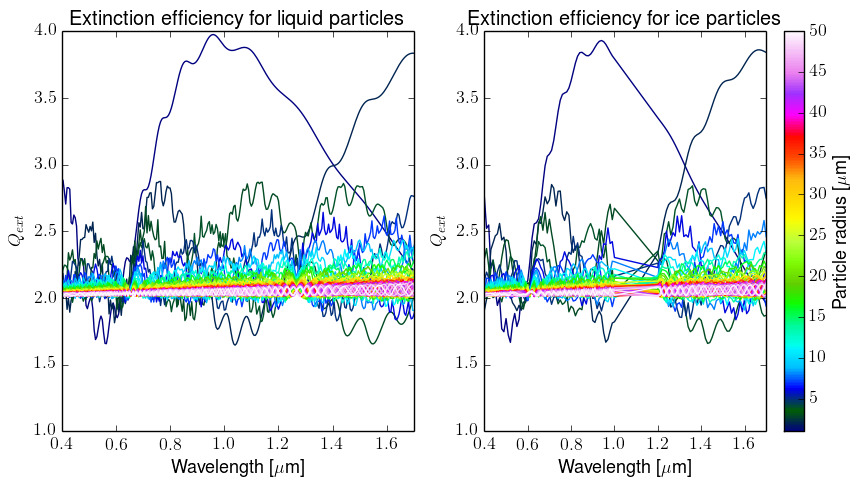

In [55]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()
color.cycle_cmap(len(r),cmap=plt.cm.gist_ncar,ax=ax[0])
color.cycle_cmap(len(r),cmap=plt.cm.gist_ncar,ax=ax[1])
for ir,rr in enumerate(r):
    ax[0].plot(wavelen_liq,qext_liq[ir,:],label='%2.0f $\mu$m' % rr)
    ax[1].plot(wavelen_ice,qext_ice[ir,:],label='%2.0f $\mu$m' % rr)
#plt.legend(frameon=True,)
ax[0].set_xlabel('Wavelength [$\mu$m]')
ax[0].set_ylabel('$Q_{ext}$')
ax[0].set_xlim([0.4,1.7])
ax[0].set_title('Extinction efficiency for liquid particles')
ax[1].set_xlabel('Wavelength [$\mu$m]')
ax[1].set_ylabel('$Q_{ext}$')
ax[1].set_xlim([0.4,1.7])
ax[1].set_title('Extinction efficiency for ice particles')

scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar)
scalarmap.set_array(r)
cbar = plt.colorbar(scalarmap)
cbar.set_label('Particle radius [$\\mu$m]')
plt.savefig(fp+'plots/Q_ext_vs_lambda_ice_liq.png',dpi=600,transparent=True)

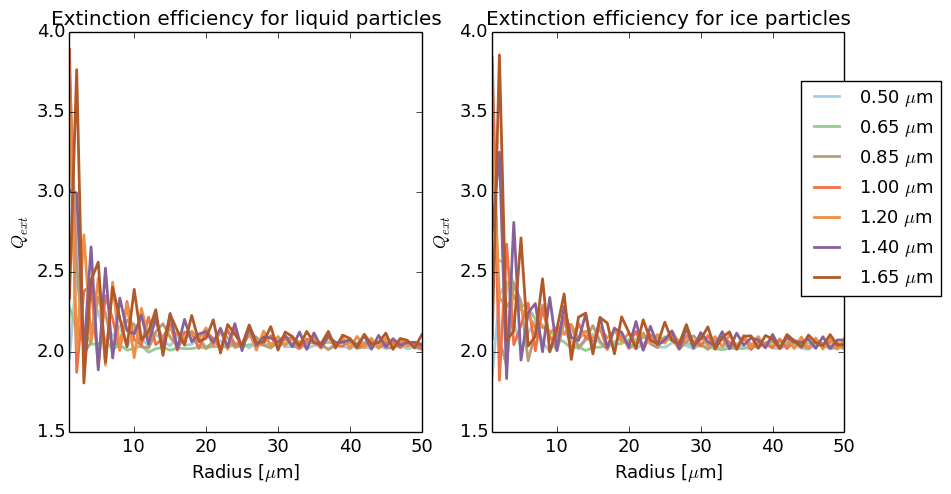

In [80]:
wvls = [0.5,0.65,0.85,1.0,1.2,1.4,1.65]
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()
color.cycle_cmap(len(wvls),cmap=plt.cm.Paired,ax=ax[0])
color.cycle_cmap(len(wvls),cmap=plt.cm.Paired,ax=ax[1])
for vv in wvls:
    vl = np.argmin(np.abs(np.array(wavelen_liq)-vv))
    vi = np.argmin(np.abs(np.array(wavelen_ice)-vv))
    ax[0].plot(r,qext_liq[:,vl],linewidth=2,label='%.2f $\mu$m' % vv)
    ax[1].plot(r,qext_ice[:,vi],linewidth=2,label='%.2f $\mu$m' % vv)
ax[0].set_xlabel('Radius [$\mu$m]')
ax[0].set_ylabel('$Q_{ext}$')
ax[0].set_xlim([1,50])
ax[0].set_title('Extinction efficiency for liquid particles')
ax[1].set_xlabel('Radius [$\mu$m]')
ax[1].set_ylabel('$Q_{ext}$')
ax[1].set_xlim([1,50])
ax[1].set_title('Extinction efficiency for ice particles')

ax[1].legend(bbox_to_anchor=(1.3,0.9))
#scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar)
#scalarmap.set_array(r)
#cbar = plt.colorbar(scalarmap)
#cbar.set_label('Particle radius [$\\mu$m]')
plt.savefig(fp+'plots/Q_ext_vs_radius_ice_liq.png',dpi=600,transparent=True)

In [88]:
wavelen_liq[250]

1.65

In [95]:
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

In [101]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(func, r, qext_liq[:,250], p0=(1, 0.2, 1))
print popt,pcov

[ 0.87495122  0.22795525  2.08105225] [[ 0.07699671  0.02066927  0.00091499]
 [ 0.02066927  0.01042421  0.00188028]
 [ 0.00091499  0.00188028  0.00158616]]


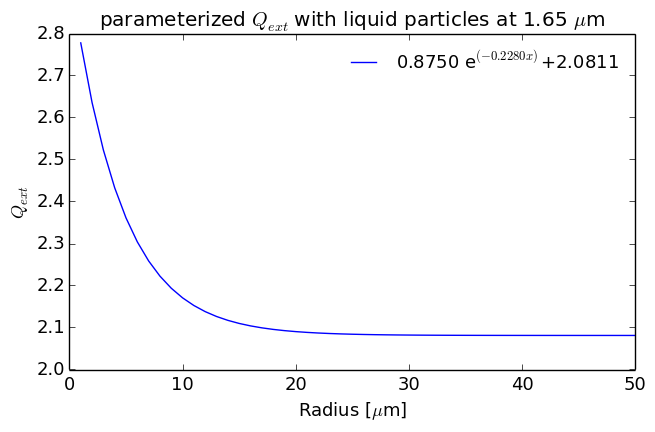

In [106]:
plt.plot(r,func(r,*popt),label='%1.4f e$^{(-%1.4f x)}$+%1.4f' % (popt[0],popt[1],popt[2]))
plt.xlabel('Radius [$\\mu$m]')
plt.ylabel('$Q_{ext}$')
plt.title('parameterized $Q_{ext}$ with liquid particles at 1.65 $\\mu$m')
plt.legend(frameon=False)
plt.savefig(fp+'plots/Q_ext_liq_param.png',dpi=600,transparent=True)